# **Python and Machine Learning Bootcamp**

### **Predicting the Housing Price (Regression Analysis)**
#### **Prithwijit Ghosh**

## **Loading the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SC
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [ ]:
Data = pd.read_csv("/content/Housing.csv")
Data = pd.DataFrame(Data)
Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
Data.shape

(545, 13)

## **Converting the categorical features into the dummy ones**

In [ ]:
Data = pd.get_dummies(Data)
Data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


Let,s get rid off from the dependency by deleting the redundant columns

In [ ]:
Data = pd.DataFrame(Data.drop(["mainroad_no","guestroom_no","basement_no","hotwaterheating_no","airconditioning_no","prefarea_no","furnishingstatus_unfurnished"],axis = 1))
Data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0


In [ ]:
Data.shape

(545, 14)

## **Data Cleaning**

Missing Values

In [ ]:
np.sum(Data.isna())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
dtype: int64

Outliers

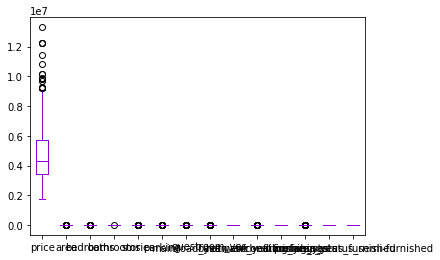

In [ ]:
#plt.figure(figsize = (100,200)
Data.plot.box(color = "darkviolet")
plt.show()

## **Splitting Data into Train and Test**

In [ ]:
y = Data.price.values.reshape(-1,1)
X = Data.drop(["price"],axis = 1).values
print ("Dimension of X :",X.shape)
print("Dimension of y :",y.shape)

Dimension of X : (545, 13)
Dimension of y : (545, 1)


In [ ]:
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
pd.DataFrame(X).head()
np.sum(pca.explained_variance_ratio_)

0.9999999503606599

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 10)
(109, 10)
(436, 1)
(109, 1)


## **Standardize the Data**

In [ ]:
Sc = SC()
X_train = Sc.fit_transform(X_train)
X_test = Sc.fit_transform(X_test)
#y_train = Sc.fit_transform(y_train)
#y_test = Sc.fit_transform(y_test)

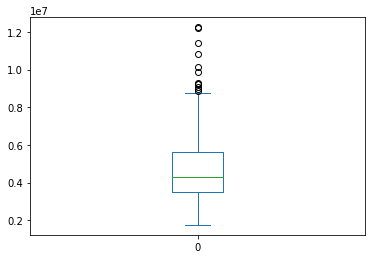

In [ ]:
pd.DataFrame(y_train).plot.box()
plt.show()

## **Model Fitting**

### **1. Linear Regression**

In [ ]:
MLR = LinearRegression()
MLR.fit(X_train,y_train)
MLR_predict = MLR.predict(X_test)


In [ ]:
print("The mean squared error for this model is :",mean_squared_error(y_test,MLR_predict))
print ("The R-squred value this model is :",r2_score(y_test,MLR_predict))

The mean squared error for this model is : 1844579505613.9905
The R-squred value this model is : 0.6350669956674468


In [ ]:
residual = y_test - MLR_predict

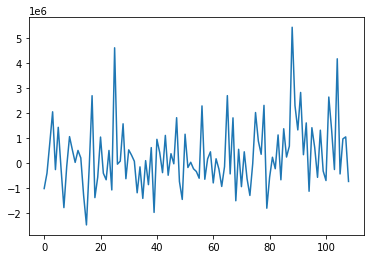

In [ ]:
plt.plot(np.arange(len(y_test)),residual)

### **2. Gradient Boosting**

In [ ]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
GBR_predict = GBR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("The mean squared error for this model is :",mean_squared_error(y_test,GBR_predict))
print ("The R-squred value this model is :",r2_score(y_test,GBR_predict))

The mean squared error for this model is : 2139476802430.7058
The R-squred value this model is : 0.5767242914525637


In [ ]:
GBR_residual = y_test - GBR_predict

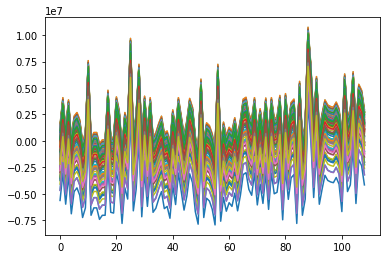

In [ ]:
plt.plot(np.arange(len(y_test)),GBR_residual)
plt.show()

## **Adaboost**

In [ ]:
ABR = AdaBoostRegressor()
ABR.fit(X_train,y_train)
ABR_predict = ABR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("The mean squared error for this model is :",mean_squared_error(y_test,ABR_predict))
print ("The R-squred value this model is :",r2_score(y_test,ABR_predict))

The mean squared error for this model is : 2490650502022.2227
The R-squred value this model is : 0.5072478211543361


## **XgBoost Regressor**

In [ ]:
XGB = XGBRegressor(n_estimators = 1000,loss = 'squared',max_depth = 10)
XGB.fit(X_train,y_train)
XGB_predict = XGB.predict(X_test)
        

[17:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("The mean squared error for this model is :",mean_squared_error(y_test,ABR_predict))
print ("The R-squred value this model is :",r2_score(y_test,ABR_predict))

The mean squared error for this model is : 2490650502022.2227
The R-squred value this model is : 0.5072478211543361
